In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [7]:
df=pd.read_csv("disease_800.csv")
df

,Age,Blood_Pressure,Cholesterol,Heart_Rate,BMI,Smoking,Alcohol_Intake,Physical_Activity,Family_History,Disease
0,62,110,180,63,27.58,No,High,Medium,Yes,0
1,30,91,299,113,20.27,Yes,High,Medium,Yes,1
2,31,155,287,62,25.48,No,Low,Medium,No,1
3,53,96,279,92,25.12,No,High,High,Yes,1
4,69,140,175,85,32.40,No,Low,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...
795,56,156,227,86,21.22,Yes,High,Low,Yes,1
796,56,162,271,109,26.03,Yes,Low,High,Yes,1
797,22,86,159,72,31.13,Yes,Moderate,Low,Yes,1
798,53,141,256,106,24.89,Yes,Moderate,High,Yes,1


In [8]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,Age,Blood_Pressure,Cholesterol,Heart_Rate,BMI,Smoking,Alcohol_Intake,Physical_Activity,Family_History,Disease
0,62,110,180,63,27.58,0,0,2,1,0
1,30,91,299,113,20.27,1,0,2,1,1
2,31,155,287,62,25.48,0,1,2,0,1
3,53,96,279,92,25.12,0,0,0,1,1
4,69,140,175,85,32.40,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
795,56,156,227,86,21.22,1,0,1,1,1
796,56,162,271,109,26.03,1,1,0,1,1
797,22,86,159,72,31.13,1,2,1,1,1
798,53,141,256,106,24.89,1,2,0,1,1


In [9]:
x=df.drop('Disease',axis=1)
y=df['Disease']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1])

In [13]:
accuracy=accuracy_score(y_test,y_pred)   
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score100.00%


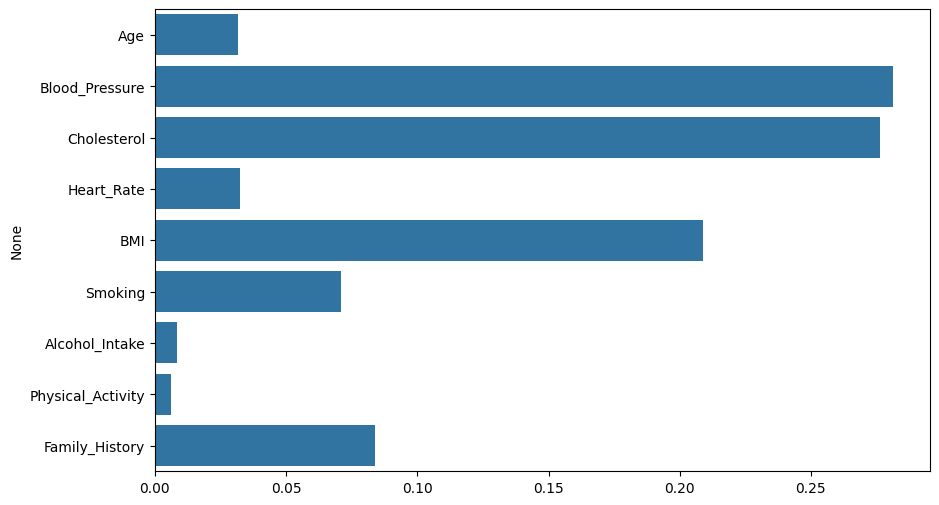

In [14]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [15]:
data=pd.DataFrame({
    "Age":[35],
    "Blood_Pressure":[120],
    "Cholesterol":[230],
    "Heart_Rate":[80],
    "BMI":[30.5],
    "Smoking":["No"],
    "Alcohol_Intake":["Low"],
    "Physical_Activity":["High"],
    "Family_History":["yes"],


})
data["Age"]=label.fit_transform(data["Age"])
data["Blood_Pressure"]=label.fit_transform(data["Blood_Pressure"])
data["Cholesterol"]=label.fit_transform(data["Cholesterol"])
data["Heart_Rate"]=label.fit_transform(data["Heart_Rate"])
data["BMI"]=label.fit_transform(data["BMI"])
data["Smoking"]=label.fit_transform(data["Smoking"])
data["Alcohol_Intake"]=label.fit_transform(data["Alcohol_Intake"])
data["Physical_Activity"]=label.fit_transform(data["Physical_Activity"])
data["Family_History"]=label.fit_transform(data["Family_History"])

predict=model.predict(data)
predict



array([0])